<a href="https://colab.research.google.com/github/kaxmarc/statistics_ml_week_2/blob/main/exercise_week_1_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris    # 150 Iris flowers - 3 types - 4 features
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew, pearsonr, ttest_ind, f_oneway

**1. Descriptive Statistics**

Compute mean, median, and standard deviation of sepal length, grouped by species

Identify which species shows the highest variability

Brief interpretation (1–2 lines)

In [2]:
# load Iris dataset (sepal length, sepal width, petal length, petal width, species).
data = load_iris()

iris_features = data.data               # sepal length, sepal width, petal length, petal width
iris_species = data.target              # Species-Codes
iris_species_names = data.target_names  # Species-Names

sepal_length = iris_features[:, 0]      # all rows in column 1 (sepal length)

results = {}

for i in range(len(iris_species_names)):
  species = iris_species_names[i]
  measures = sepal_length[iris_species == i]

  mean = np.mean(measures)
  median = np.median(measures)
  std = np.std(measures, ddof=1)        # ddof=1 for the sample from all iris flowers

  results[species] = {
      "mean": mean,
      "median": median,
      "std": std
  }

for iris_species_names, stats_dict in results.items():
  print(f"\nSpecies:  {iris_species_names}")
  print(f"Mean:       {stats_dict['mean']}")
  print(f"Median:     {stats_dict['median']}")
  print(f"Std:        {stats_dict['std']}")

max_species = max(results, key=lambda s: results[s]["std"])       # Species whose values vary most widely
print(f"\nSpecies with the highest variability: {max_species} ")



Species:  setosa
Mean:       5.006
Median:     5.0
Std:        0.35248968721345136

Species:  versicolor
Mean:       5.936
Median:     5.9
Std:        0.5161711470638634

Species:  virginica
Mean:       6.587999999999998
Median:     6.5
Std:        0.6358795932744322

Species with the highest variability: virginica 


Brief interpretation

Virginica has both the highest mean value and the highest variability in sepal length. This species generally has longer and more varied sepal sizes compared to Setosa and Versicolor.

**2. Central Tendency & Dispersion**

For petal length (per species), compute:

mean

median

mode (if any)

variance

standard deviation

Explain briefly:

When does the median tell a different story than the mean?

In [3]:
# load Iris dataset (sepal length, sepal width, petal length, petal width, species).
data = load_iris()

iris_features = data.data               # sepal length, sepal width, petal length, petal width
iris_species = data.target              # Species-Codes
iris_species_names = data.target_names  # Species-Names

petal_length = iris_features[:, 2]      # all rows in column 3 (petal length)

results = {}

for i in range(len(iris_species_names)):
  species = iris_species_names[i]
  measures = petal_length[iris_species == i]

  mean = np.mean(measures)
  median = np.median(measures)
  mode_res = stats.mode(measures, keepdims=True)
  mode = mode_res.mode[0]
  var = np.var(measures, ddof=1)
  std = np.std(measures, ddof=1)

  results[species] = {
      "mean": mean,
      "median": median,
      "mode": mode,
      "var": var,
      "std": std
  }

for iris_species_names, stats_dict in results.items():
  print(f"\nSpecies:  {iris_species_names}")
  print(f"Mean:       {stats_dict['mean']}")
  print(f"Median:     {stats_dict['median']}")
  print(f"Mode:       {stats_dict['mode']}")
  print(f"Variance:   {stats_dict['var']}")
  print(f"Std:        {stats_dict['std']}")



Species:  setosa
Mean:       1.4620000000000002
Median:     1.5
Mode:       1.4
Variance:   0.030159183673469384
Std:        0.17366399648018407

Species:  versicolor
Mean:       4.26
Median:     4.35
Mode:       4.5
Variance:   0.22081632653061228
Std:        0.46991097723995795

Species:  virginica
Mean:       5.5520000000000005
Median:     5.55
Mode:       5.1
Variance:   0.30458775510204084
Std:        0.5518946956639834


When does the median tell a different story than the mean?

The mean and median only tell a different story when there are extreme values or skewness that distort the mean. In the output, both values are very close to each other, which indicates that the petal lengths per species are symmetrically distributed and without significant outliers.

**3. Visualization**

Plot a histogram of petal width (all species combined)

Create a boxplot of sepal length, grouped by species

Answer:

Which plot better shows between-species differences, and why?

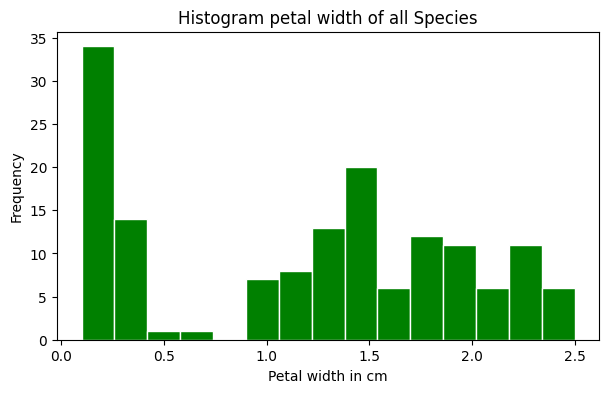

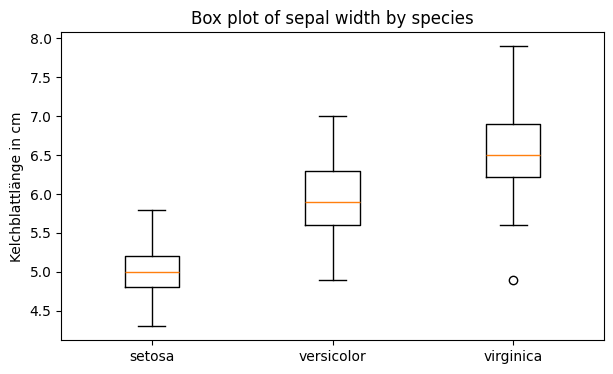

In [4]:
# load Iris dataset (sepal length, sepal width, petal length, petal width, species).
data = load_iris()

iris_features = data.data               # sepal length, sepal width, petal length, petal width
iris_species = data.target              # Species-Codes
iris_species_names = data.target_names  # Species-Names

sepal_length = iris_features[:, 0]       # all rows in column 1 (sepal length)
petal_width = iris_features[:, 3]      # all rows in column 4 (petal width)

# Histogram
plt.figure(figsize=(7,4))
plt.hist(petal_width, bins=15, color="green", edgecolor="white")
plt.title("Histogram petal width of all Species")
plt.xlabel("Petal width in cm")
plt.ylabel("Frequency")
plt.show()

# Boxplot
box = [sepal_length[iris_species ==i] for i in range(len(iris_species_names))]

plt.figure(figsize=(7,4))
plt.boxplot(box, tick_labels=iris_species_names)
plt.title("Box plot of sepal width by species")
plt.ylabel("Kelchblattlänge in cm")
plt.show()

Which plot better shows between-species differences, and why?

The box plot shows the difference between the species more clearly because it displays the distribution of values for each species separately, making the median, dispersion and differences directly visible. The historgram summarises all species. Differences between the groups are not apparent.

**4. Distributions & Skewness**

Compute skewness of petal length for each species

Identify:

Most positively skewed

Most negatively skewed

Provide a short interpretation

In [5]:
# load Iris dataset (sepal length, sepal width, petal length, petal width, species).
data = load_iris()

iris_features = data.data               # sepal length, sepal width, petal length, petal width
iris_species = data.target              # Species-Codes
iris_species_names = data.target_names  # Species-Names

petal_length = iris_features[:, 2]      # all rows in column 3 (petal length)

skews = {}

for i in range(len(iris_species_names)):
  species = iris_species_names[i]
  measures = petal_length[iris_species == i]
  skews[species] = skew(measures, bias=False)

for species, sk in skews.items():
  print(f"{species}: Skew = {sk}")

setosa: Skew = 0.1063938996982434
versicolor: Skew = -0.6065076894906241
virginica: Skew = 0.5494445890270053


Interpretation:

Virginica has particularly large petals due to its strong skew (positive). In contrast, Versicolor shows a pronounced number of smaller values (negative). Setosa is in the middle range, behaving almost symmetrically.

**5. Sampling & Central Limit Theorem (Mini Task)**

Take 100 random samples of size n = 20 from sepal length

Store the sample means

Plot:

Histogram of the sample means

Histogram of the original sepal length

Compare the two distributions (1–2 lines)

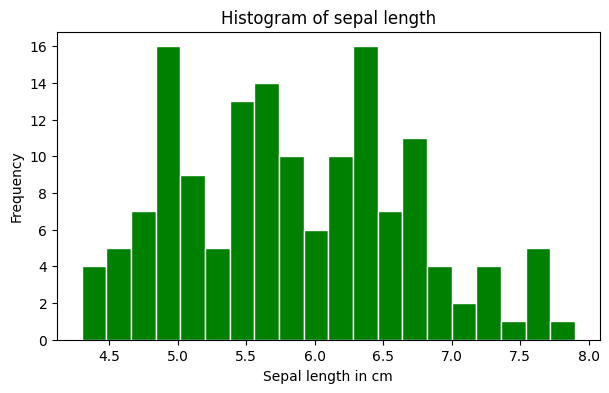

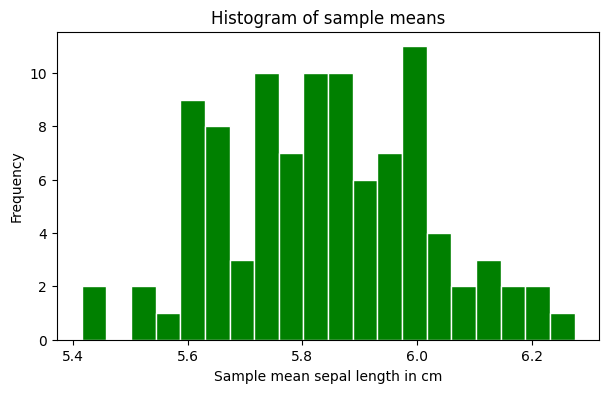

In [6]:
# load Iris dataset (sepal length, sepal width, petal length, petal width, species).
data = load_iris()

iris_features = data.data               # sepal length, sepal width, petal length, petal width

sepal_length = iris_features[:, 0]      # all rows in column 1 (sepal length)

samples = 100
n = 20

samples_mean = []                       # means
rand = np.random.default_rng(42)        # seed/reproducible

for _ in range(samples):
  sample = rand.choice(sepal_length, size=n, replace=True)
  samples_mean.append(np.mean(sample))

# Histogram sepal length
plt.figure(figsize=(7,4))
plt.hist(sepal_length, bins=20, color="green", edgecolor="white")
plt.title("Histogram of sepal length")
plt.xlabel("Sepal length in cm")
plt.ylabel("Frequency")
plt.show()

# Histogram sample means
plt.figure(figsize=(7,4))
plt.hist(samples_mean, bins=20, color="green", edgecolor="white")
plt.title("Histogram of sample means")
plt.xlabel("Sample mean sepal length in cm")
plt.ylabel("Frequency")
plt.show()

Compare the two distributions:

The distribution of source values is broader, whereas the sample means are more closely concentrated. This demonstrates the central limit theorem, according to which the distribution more closely approximates a normal distribution.

**6. Correlation**

Compute Pearson correlation (r) between:

sepal length

petal length

State whether the relationship is:

positive, negative or none

Plot:

Scatter plot with best-fit line

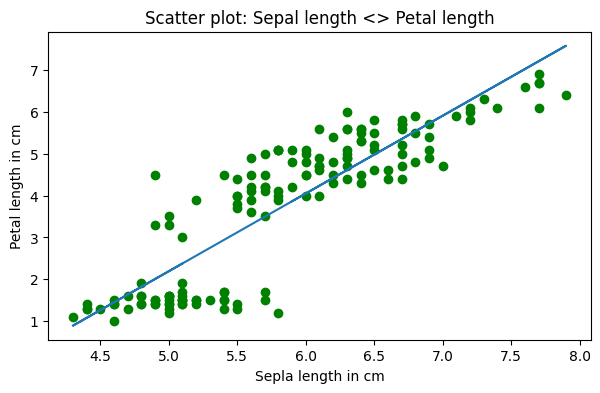


Correlation = 0.8717537758865831, relationship: positiv


In [7]:
# load Iris dataset (sepal length, sepal width, petal length, petal width, species).
data = load_iris()

iris_features = data.data                 # sepal length, sepal width, petal length, petal width

sepal_length = iris_features[:, 0]        # all rows in column 1 (sepal length)
petal_length = iris_features[:, 2]        # all rows in column 3 (petal length)

corr, p_corr = stats.pearsonr(sepal_length, petal_length)

if corr > 0.1:
  relationship = "positiv"
elif corr < -0.1:
  relationship = "negativ"
else:
  relationship = "keine"

plt.figure(figsize=(7,4))
plt.scatter(sepal_length, petal_length, color="green")
m, b = np.polyfit(sepal_length, petal_length, 1)          # First-degree polynomial: straight line
plt.plot(sepal_length, m*sepal_length + b)                # y = m • X + b (best-fit line)
plt.title("Scatter plot: Sepal length <> Petal length")
plt.xlabel("Sepla length in cm")
plt.ylabel("Petal length in cm")
plt.show()

print(f"\nCorrelation = {corr}, relationship: {relationship}")

Interpretation:

There is a strong positive correlation (0.87). The petal becomes longer in relation to the sepal.

**7. Hypothesis Testing: t-Test (2 Groups)**

Test whether Setosa and Versicolor have the same mean petal length

Report:

t-statistic

p-value

Provide a one-line conclusion

In [8]:
# load Iris dataset (sepal length, sepal width, petal length, petal width, species).
data = load_iris()

iris_features = data.data                 # sepal length, sepal width, petal length, petal width
iris_species = data.target                # Species-Codes

petal_length = iris_features[:, 2]        # all rows in column 3 (petal length)

iris_setosa = petal_length[iris_species==0]
iris_versicolor = petal_length[iris_species==1]

t_stat, p_value = ttest_ind(iris_setosa, iris_versicolor, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -39.492719391538095
p-value: 9.934432957587695e-46


Conclusion:

According to the t-statistic, the difference in petal length is extremely large (-39.49). In addition, the p-value is extremely small, making it practically impossible for the large difference to be a random observation.

**8. Hypothesis Testing: ANOVA (3 Groups)**

Test whether petal width differs across:

Setosa, Versicolor and Virginica

Report:

F-statistic

p-value

Provide a one-line conclusion

In [9]:
# load Iris dataset (sepal length, sepal width, petal length, petal width, species).
data = load_iris()

iris_features = data.data                       # sepal length, sepal width, petal length, petal width
iris_species = data.target                      # Species-Codes

setosa = iris_features[iris_species == 0, 3]      # petal width in column 4
versicolor = iris_features[iris_species == 1, 3]
virginica = iris_features[iris_species == 2, 3]

f_stat, p_value = f_oneway(setosa, versicolor, virginica)

print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

F-statistic: 960.0071468018067
p-value: 4.169445839443833e-85


Conclusion:

With the large value F (960.01) and the small value p (less than 0.05), the average petal width between Setosa, Versicolor and Virginica differs significantly.